# Explore here

In [ ]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado (install scikit-learn)
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

archivo="https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()



Contamos con 1338 cantidad de datos y 7 atributos.

Contamos con 1 datos duplicados

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


- Contamos con 1.338 datos de clientes y 7 atributos.
- 1 dato de cliente está duplicado. Al eliminarlo resulta un total de 1.337 datos de clientes.
- Ninguno de los atributos posee valores nulos.
- 4 características son numéricas y 3 características son categóricas. Queremos predecir la el valor de la prima que está descripta en la variable numérica nominada como "charges".

### Selección de atributos relevantes

Todos los atributos son relevantes para nuestro objetivo.

### Análisis univariante

Variables Categóricas: 
- sex: female/male
- smoker: yes/no
- region

In [26]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [27]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [28]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

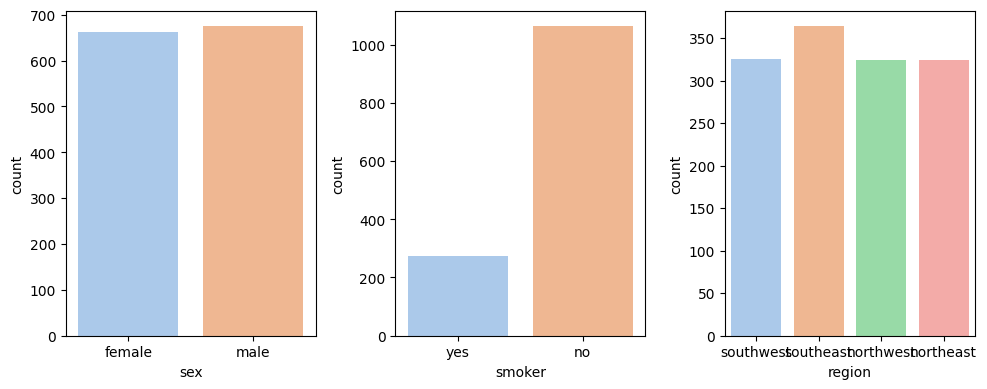

In [29]:
fig, axis = plt.subplots(1, 3, figsize = (10, 4))

sns.countplot(ax = axis[0], data = df, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[1], data = df, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[2], data = df, x = "region", palette='pastel', hue= "region", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Podemos observar que el género de los clientes se distribuyen bastante uniformemente, al igual que la region (habiendo un pequeño mayor porcentaje de clientes que residen en el sudeste de USA.)
- La gran mayoría de los clientes son no fumadores.

Variables numéricas:

- age: Edad del beneficiario principal.
- bmi: Índice de masa corporal.
- children: Número de dependientes cubiertos por un seguro médico.	
- charges: Prima del seguro médico.

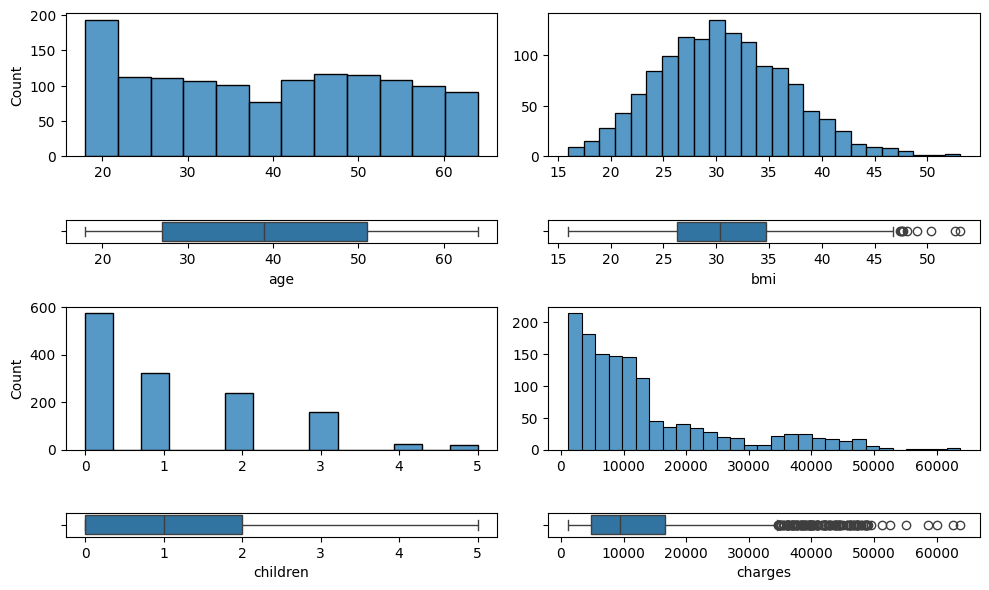

In [30]:
fig, axis = plt.subplots(4, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Hay aproximadamente un 50% más de clientes que rondan los 20 años con respecto a los que rondan los 30, 40, 50 y 60 años, que se distribuyen de manera uniforme.
- El índice de masa corporal tiene una distribución normal, con una media aproximada de 30.
- La mayoría de los clientes no tienen hijos cubiertos por el seguro médico, y va decreciendo la cantidad hasta llegan a unos pocos clientes que tienen entre 4 o 5 hijos con cobertura.
- En general los clientes tienen a contratar un seguro médico con una prima baja.
- No encontramos valores atípicos en la edad ni en la cantidad de hijos con cobertura.

### Análisis multivariante

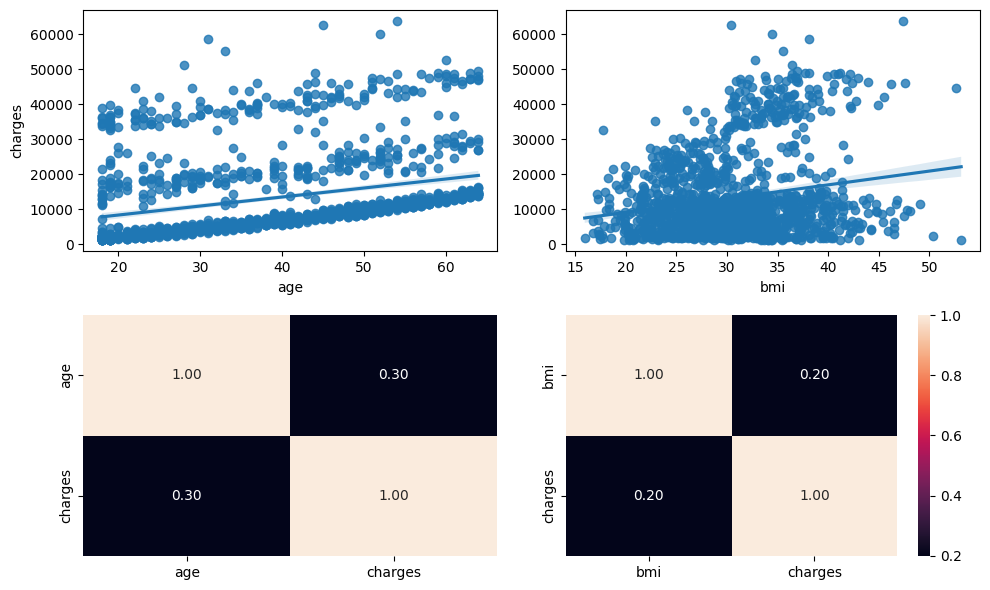

In [31]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No hay una correlación significativa entre la edad y la prima ni entre el índice de masa corporal y la prima.

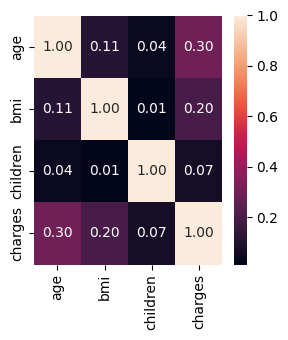

In [32]:
fig, axis = plt.subplots(figsize = (3, 3.5))

sns.heatmap(df[["age", "bmi", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

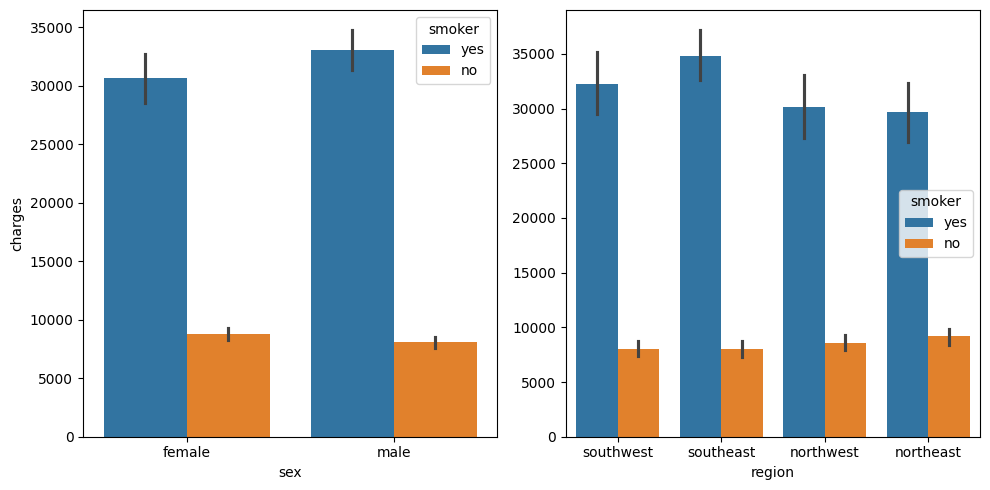

In [33]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

# Calcular la proporción de supervivencia por clase y sexo
sns.barplot(ax = axis[0], data = df, x = "sex", y = "charges", hue = "smoker")
# Calcular la proporción de supervivencia por puerto y sexo
sns.barplot(ax = axis[1], data = df, x = "region", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

Los fumadores y no fumadores están distribuidos bastante uniformemente con respecto a la edad y a la región de residencia.

In [40]:
# Factorizando variables categóricas.

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["smoker_n"] = df["smoker_n"].map({0: 1, 1: 0})  # Invertir el mapeo 
df["region_n"] = pd.factorize(df["region"])[0]




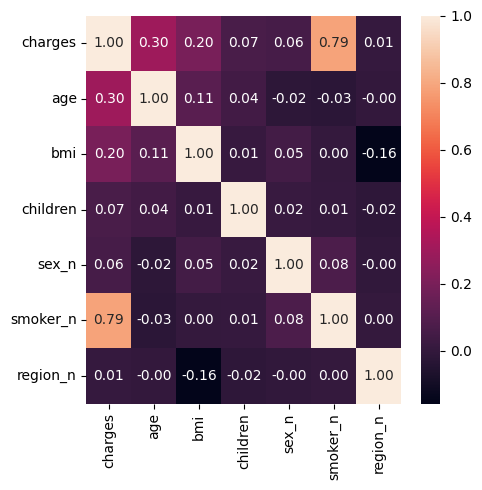

In [41]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["charges", "age", "bmi", "children", "sex_n","smoker_n", "region_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Podemos observar que las variables smoker y charges están bastante correlacionadas.

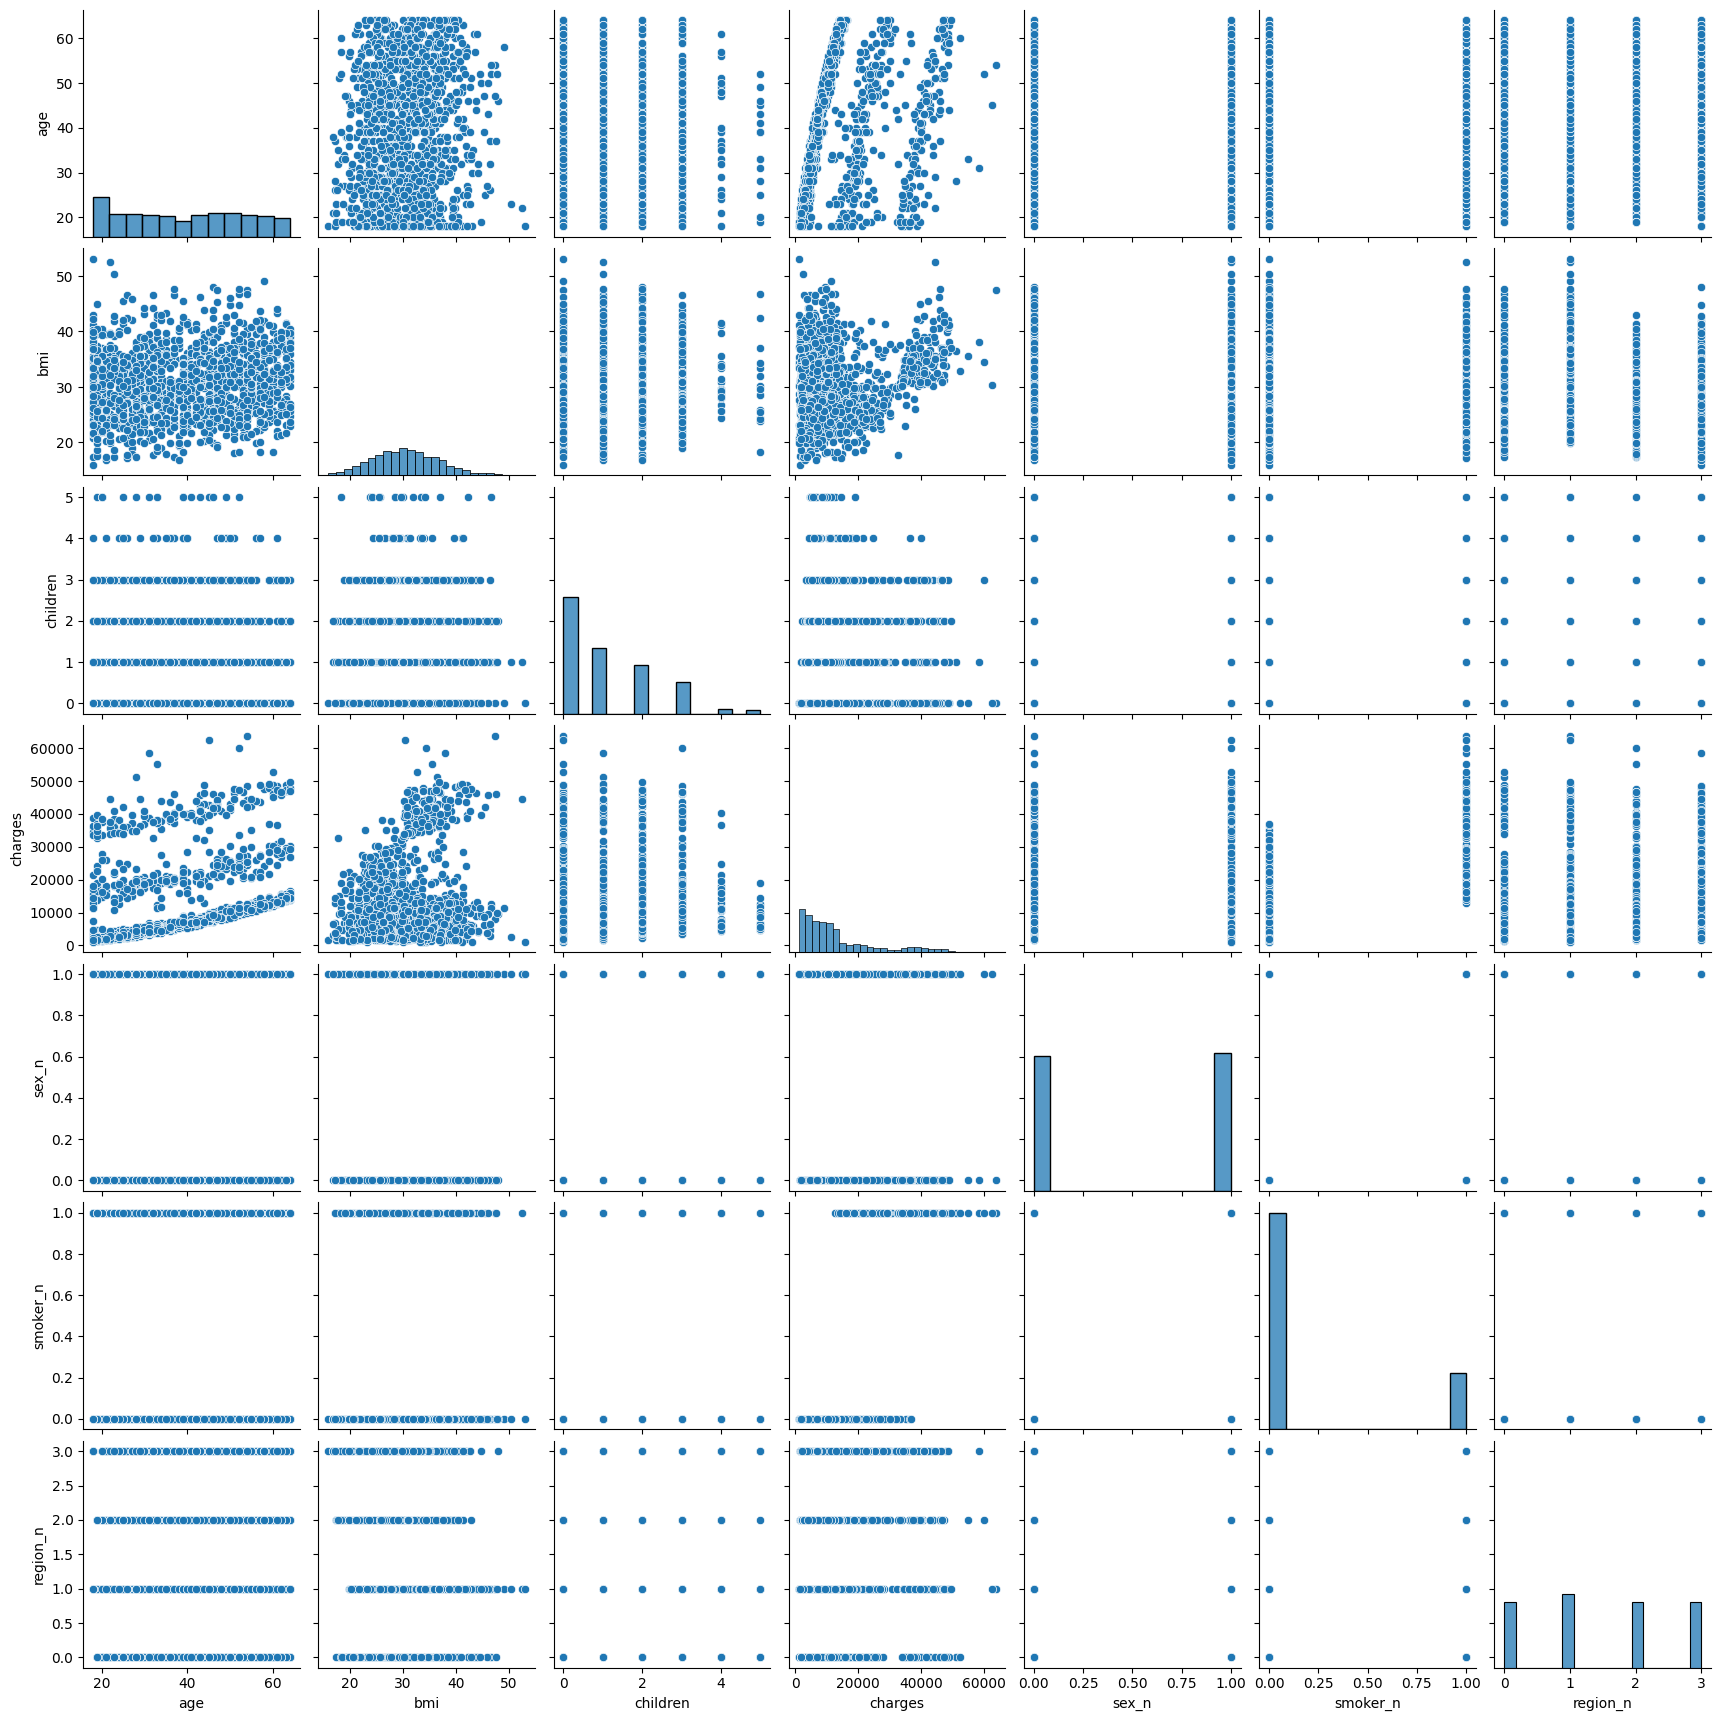

In [42]:
# relaciones todos con todos
sns.pairplot(data = df)

### Valores atípicos

In [2]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


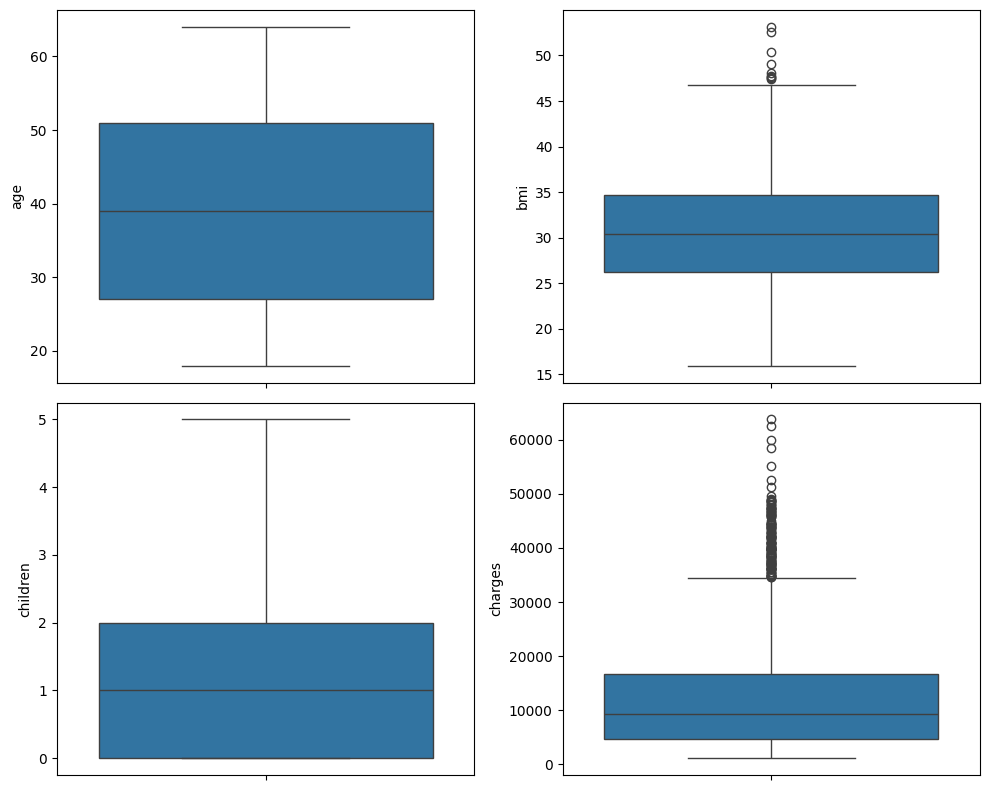

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = df, y = "children")
sns.boxplot(ax = axis[1, 1], data = df, y = "charges")


plt.tight_layout()

plt.show()

Encontramos valores atípicos en las variables bmi y charges. 
En la variable bmi, el valor máximo no es tan distante de la media. Concluimos que no son valores para eliminar.

In [6]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de charges
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [8]:
charges_altos = df[df["charges"] >= 34524.78]

charges_altos

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


Al ser charges nuestra variable objetivo, dejaremos los datos para tener una mejor predicción, ya que no es inusual que haya clientes que paguen una prima más alta para tener una mejor cobertura.

### Valores faltantes

In [9]:

df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay valores faltantes en nuestro dataset.

### Ingeniería de atributos

En este dataset voy a realizar los cambios antes de hacer el split.